<a href="https://colab.research.google.com/github/BrianDL/fisica_computacional/blob/main/euler.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np

### definimos primero los parámetros con los valores dados
### por defecto
def proyectil(
    b2_m:float = 0.00004  # b2 sobre m
    , g:float = 9.8         # el valor de la gravedad
    , v_0:float = 700       # velocidad inicial
    , theta:float = (1.0/6)*np.pi   # el ángulo inicial
    , N:int = 100000        # el número de iteraciones a realizar
    , delta_t:float = 0.01  # tamaño de paso de la simulación
    , stop_fn = None
  ):

  stop_fn = stop_fn if stop_fn is not None else \
    lambda i,x,y,vx,vy: i >= N

  ### extraemos algunos valores iniciales
  x:float   = 0
  y:float   = 0
  v_x:float = v_0 * np.cos(theta)
  v_y:float = v_0 * np.sin(theta)
  #print("INIT", x, y, v_x, v_y)

  ### iteramos luego el número deseado
  ### de veces y devolvemos los resultados
  xs:list = []
  ys:list = []
  vel_xs:list = []
  vel_ys:list = []

  i = 0
  while not stop_fn(i,x,y,v_x,v_y):
    current_v = v(v_x,v_y)

    v_x = round(v_x -(b2_m) * v_x * current_v * delta_t, 5)
    v_y = round(v_y -(b2_m) * v_x * current_v * delta_t -g*delta_t, 5)

    x = x +v_x*delta_t
    y = y +v_y*delta_t

    ### guardamos los resultados
    xs.append(x)
    ys.append(y)

    vel_xs.append(v_x)
    vel_ys.append(v_y)

    i+=1

    #print("STEP", i , x, y, v_x, v_y)

  return (xs, ys, vel_xs, vel_ys)


### funciones auxiliares
def v(v_x, v_y):
  return np.sqrt( v_x**2 + v_y**2 )

def es_x_maximo(i,x,y,vx,vy)->bool:
  return i > 0 and y <= 0




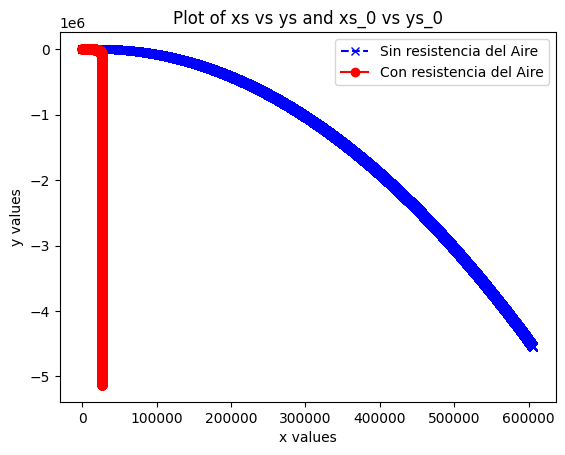

In [2]:
import matplotlib.pyplot as plt

### Simulamos ahora un lanzamiento de proyectil
### sin resistencia del aire, para esto configuramos
### b2/m = 0 y mostramos la trayectoria

(xs_0, ys_0, _, _) = proyectil(b2_m=0) # sin resistencia del aire
(xs, ys, _, _) = proyectil() # con resistencia del aire

plt.plot(xs_0, ys_0, marker='x', linestyle='--', color='b', label='Sin resistencia del Aire')
plt.plot(xs, ys, marker='o', linestyle='-', color='r', label='Con resistencia del Aire')


plt.title('Plot of xs vs ys and xs_0 vs ys_0')
plt.xlabel('x values')
plt.ylabel('y values')

plt.legend()

plt.show()

MAX_X: 15258.337457300018


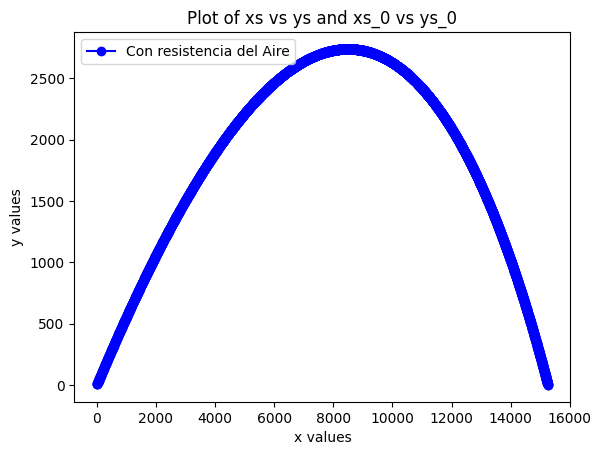

In [3]:
### para encontrar el alcance horizontal, pasamos una función que le
### indique a la simulación que se detenga al encontrar y <= 0

(xs, ys, _, _) = proyectil(stop_fn= es_x_maximo)

print('MAX_X:', xs[-1])

plt.plot(xs, ys, marker='o', linestyle='-', color='b', label='Con resistencia del Aire')


plt.title('Plot of xs vs ys and xs_0 vs ys_0')
plt.xlabel('x values')
plt.ylabel('y values')

plt.legend()

plt.show()


In [4]:
### Usamos la misma estrategia para comparar varios
### ángulos y el alcance horizontal que tienen

def angulos_a_alcance(
    delta_theta:int = 5   # en grados
    , b2_m:float = 0.0    # ignoramos la resistencia del aire por defecto
  ):

  resultado = {}

  grados = 0
  while grados < 90:
    theta = radianes_desde(grados)

    xs, _, _, _= proyectil(
          theta= theta  # usamos el ángulo dado
          , b2_m= b2_m
          , stop_fn= es_x_maximo # detenemos cada simulación en x máximo
        )

    resultado[grados] = xs[-1]
    #print('STEP', grados, resultado[theta])

    grados += delta_theta

  return resultado

### funciones auxiliares
def radianes_desde(grados:int)-> float:
  return (np.pi/180) * grados

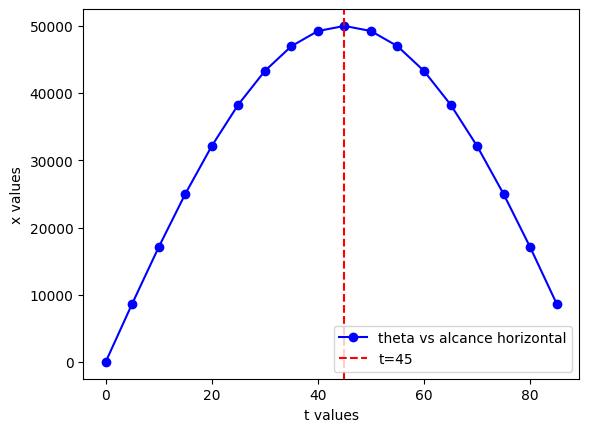

In [5]:
resultado = angulos_a_alcance() # simulamos muchos tiros parabólicos


ts = list(resultado.keys())
xs = list(resultado.values())

plt.plot(ts, xs, marker='o', linestyle='-', color='b', label='theta vs alcance horizontal')
plt.axvline(x=45, color='r', linestyle='--', label='t=45')  # dibujamos una línea vertical en t = 45

#plt.title('Plot of xs vs ys and xs_0 vs ys_0')
plt.xlabel('t values')
plt.ylabel('x values')

plt.legend()

plt.show()


RESULTADO: {0: 6.99804, 0.5: 285.31412020000005, 1.0: 574.1834519, 1.5: 866.3810046, 2.0: 1155.0041000000006, 2.5: 1446.670004, 3.0: 1734.6403112000012, 3.5: 2018.9357827000006, 4.0: 2305.9425924999996, 4.5: 2595.4525503, 5.0: 2881.0473524, 5.5: 3168.8897427000015, 6.0: 3452.7200808000034, 6.5: 3732.565806900003, 7.0: 4020.281493299998, 7.5: 4297.937715500003, 8.0: 4583.0841043, 8.5: 4863.930924000001, 9.0: 5140.512344499999, 9.5: 5418.414079399996, 10.0: 5697.458807499993, 10.5: 5972.0623987, 11.0: 6247.605286000003, 11.5: 6523.917438500008, 12.0: 6795.629556400005, 12.5: 7067.919496499994, 13.0: 7335.557716300001, 13.5: 7603.587755700002, 14.0: 7871.852750599982, 14.5: 8135.331053500007, 15.0: 8398.872203600002, 15.5: 8662.327438499995, 16.0: 8920.870749699989, 16.5: 9183.780570899991, 17.0: 9437.067194099985, 17.5: 9694.439167200018, 18.0: 9946.709890300004, 18.5: 10198.302323900009, 19.0: 10444.770333299992, 19.5: 10694.662612500022, 20.0: 10939.28788600001, 20.5: 11178.69469470000

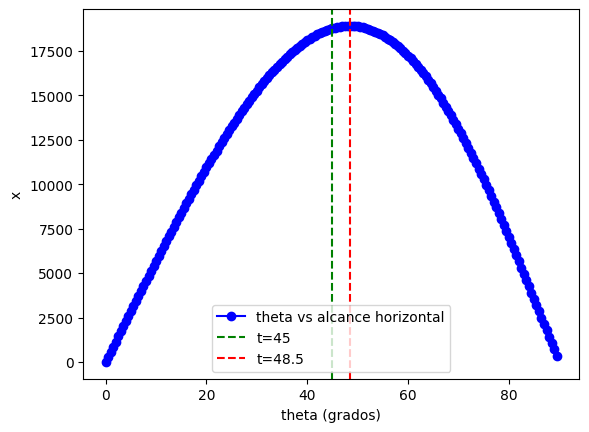

In [23]:
### Para el caso con resistencia del aire,

resultado = angulos_a_alcance(b2_m=0.00004, delta_theta= 0.5) # simulamos muchos tiros parabólicos

ts = list(resultado.keys())
xs = list(resultado.values())

plt.plot(ts, xs, marker='o', linestyle='-', color='b', label='theta vs alcance horizontal')

items = list(resultado.items())

item_max_x = sorted(items, key=lambda i: i[1])[-1]
grados_max_x, max_x = item_max_x

print('MÁXIMO_ALCANCE_HORIZONTAL', item_max_x)

plt.axvline(x=45, color='g', linestyle='--', label= 't=45')
plt.axvline(x=grados_max_x, color='r', linestyle='--', label= f't={grados_max_x}')

#plt.title('Plot of xs vs ys and xs_0 vs ys_0')
plt.xlabel('theta (grados)')
plt.ylabel('x')

plt.legend()

plt.show()


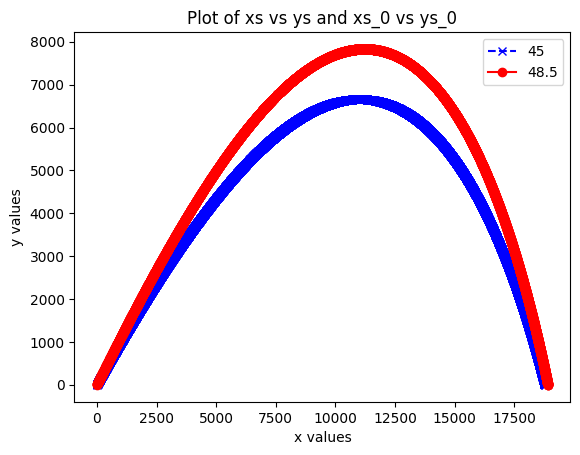

In [25]:
### Comparamos dos ángulos de lanzamiento diferente con resistencia del aire
(xs_0, ys_0, _, _) = proyectil(theta=(0.25*np.pi), stop_fn=es_x_maximo) # 45 grados
(xs, ys, _, _) = proyectil(theta=(np.pi/180.0)*48.5, stop_fn=es_x_maximo) # 48.5

plt.plot(xs_0, ys_0, marker='x', linestyle='--', color='b', label='45')
plt.plot(xs, ys, marker='o', linestyle='-', color='r', label='48.5')


plt.title('Plot of xs vs ys and xs_0 vs ys_0')
plt.xlabel('x values')
plt.ylabel('y values')

plt.legend()

plt.show()